The dataset is taken from <br>
https://data.cityofpaloalto.org/dataviews/257812/electric-vehicle-charging-station-usage-july-2011-dec-2020/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

C:\Users\Lenovo\anaconda3\envs\dataml100\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
evData = pd.read_csv("C:/Users/Lenovo/Desktop/My Git Repo/DataScienceGuide/DataScienceGuide/DataSets/EVChargingStationUsage.csv")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1468\1273708472.py:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  evData = pd.read_csv("C:/Users/Lenovo/Desktop/My Git Repo/DataScienceGuide/DataScienceGuide/DataSets/EVChargingStationUsage.csv")


In [92]:
evData.head(5)

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.0,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.0,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN


In [4]:
evData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                 259415 non-null  float64
 12  Ga

### Feature Engineering

##### Feature Elimination

In [5]:
#After revieweing each column values and uniqueness, Working with Only needed columns
workingEvData = evData.drop(['Org Name','Plug Type','Port Number','Port Type','City','State/Province','Postal Code','Country','Driver Postal Code','User ID','County','System S/N','EVSE ID','Plug In Event Id','Transaction Date (Pacific Time)','MAC Address'],axis=1)
#workingEvData[workingEvData['Start Time Zone']!= workingEvData['End Time Zone']] #120 rows because of daylight 
workingEvData.drop(['Start Time Zone','End Time Zone'],axis=1,inplace=True)
#Removing End Date as we will engineer Start Date for time insights 
workingEvData.drop(['End Date'],axis=1,inplace=True)
#Removing Latitude, Longitude as we will engineer Adress and Stations columns locations and particular stations for insights
workingEvData.drop(['Latitude','Longitude'],axis=1,inplace=True)


##### Feature Extraction

In [6]:
#Studying Data to Extract
print(workingEvData['Address 1'].unique())
print(workingEvData['Station Name'].unique())

['250 Hamilton Ave' '528 High St' 'Bryant St' '3700 Middlefield Rd'
 '1520 Walnut Dr' '1514 Walnut Dr' '500-532 Webster St' '532 Webster St'
 '275 Cambridge Ave' '400 Cambridge Ave' '445 Bryant St' '520 Webster St'
 '1213 Newell Rd' '528 high st' '528 High St.' '533 Cowper St'
 '520 Cowper St' '475 Cambridge Ave' '350 Sherman Ave' '358 Sherman Ave']
['PALO ALTO CA / HAMILTON #1' 'PALO ALTO CA / HAMILTON #2'
 'PALO ALTO CA / HIGH #4' 'PALO ALTO CA / BRYANT #2'
 'PALO ALTO CA / BRYANT #1' 'PALO ALTO CA / MPL #4'
 'PALO ALTO CA / MPL #6' 'PALO ALTO CA / MPL #2' 'PALO ALTO CA / MPL #1'
 'PALO ALTO CA / MPL #5' 'PALO ALTO CA / MPL #3'
 'PALO ALTO CA / RINCONADA LIB 2' 'PALO ALTO CA / RINCONADA LIB 1'
 'PALO ALTO CA / RINCONADA LIB 3' 'PALO ALTO CA / WEBSTER #1'
 'PALO ALTO CA / HIGH #1' 'PALO ALTO CA / WEBSTER #2'
 'PALO ALTO CA / TED THOMPSON #1' 'PALO ALTO CA / CAMBRIDGE #1'
 'PALO ALTO CA / BRYANT #3' 'PALO ALTO CA / WEBSTER #3'
 'PALO ALTO CA / CAMBRIDGE #2' 'PALO ALTO CA / HIGH #2'
 'P

In [7]:
areaList = ["hamilton","high","bryant","middlefield","walnut","webster","cambridge","newell","cowper","sherman"]
def AddressBlockExtraction(address: str):
    for area in areaList:
        if area in address.lower():
            return area
    else:
        return address

In [8]:
workingEvData['Address 1'] = workingEvData['Address 1'].apply(AddressBlockExtraction)

In [9]:
def StationExtraction(stationName : str):
    splitstationName = stationName.split("/")
    return splitstationName[1].strip()

In [10]:
workingEvData['Station Name'] = workingEvData['Station Name'].apply(StationExtraction)

In [11]:
def TimeInMinutes(totalTime: str):
    splitTime = list(map(int,totalTime.split(":")))
    totalTimeInMinutes = (splitTime[0]*60)+splitTime[1]+(splitTime[2]/60)
    return totalTimeInMinutes

In [12]:
workingEvData["Total Duration (hh:mm:ss)"] = workingEvData["Total Duration (hh:mm:ss)"].apply(TimeInMinutes)
workingEvData["Charging Time (hh:mm:ss)"] = workingEvData["Charging Time (hh:mm:ss)"].apply(TimeInMinutes)
workingEvData.rename(columns={"Total Duration (hh:mm:ss)":"Total Duration (Minutes)","Charging Time (hh:mm:ss)":"Charging Time (Minutes)"},inplace=True)

In [13]:
workingEvData["Start Date"] = pd.to_datetime(workingEvData["Start Date"])
workingEvData['Year'] = workingEvData['Start Date'].dt.year
workingEvData['Month'] = workingEvData['Start Date'].dt.month
workingEvData['Weekday'] = workingEvData['Start Date'].dt.weekday #Monday being 0 and Sunday 6

In [14]:
workingEvData

,Station Name,Start Date,Total Duration (Minutes),Charging Time (Minutes),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Address 1,Currency,Fee,Ended By,Model Number,Year,Month,Weekday
0,HAMILTON #1,2011-07-29 20:17:00,183.533333,114.050000,6.249457,2.625,0.784,hamilton,USD,0.00,Plug Out at Vehicle,NaN,2011,7,4
1,HAMILTON #1,2011-07-30 00:00:00,2.100000,1.900000,0.106588,0.045,0.013,hamilton,USD,0.00,Customer,NaN,2011,7,5
2,HAMILTON #1,2011-07-30 08:16:00,257.533333,257.466667,14.951777,6.280,1.876,hamilton,USD,0.00,Plug Out at Vehicle,NaN,2011,7,5
3,HAMILTON #1,2011-07-30 14:51:00,123.400000,122.966667,7.159643,3.007,0.899,hamilton,USD,0.00,Customer,NaN,2011,7,5
4,HAMILTON #1,2011-07-30 18:51:00,71.400000,43.900000,1.957765,0.822,0.246,hamilton,USD,0.00,Plug Out at Vehicle,NaN,2011,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,TED THOMPSON #3,2020-12-31 16:39:00,35.733333,35.300000,1.841000,0.773,0.231,cambridge,USD,0.42,Plug Out at Vehicle,CT4020-HD-GW,2020,12,3
259411,WEBSTER #1,2020-12-31 16:48:00,223.016667,134.066667,12.744000,5.352,1.599,webster,USD,4.69,Plug Out at Vehicle,CT4020-HD-GW,2020,12,3
259412,MPL #4,2020-12-31 17:28:00,1048.233333,308.200000,29.665000,12.459,3.723,middlefield,USD,6.82,Plug Out at Vehicle,CT4010-HD-GW,2020,12,3
259413,WEBSTER #1,2020-12-31 17:49:00,245.566667,233.700000,11.976000,5.030,1.503,webster,USD,2.75,Plug Out at Vehicle,CT4020-HD-GW,2020,12,3


##### Handling Missing Values

<Axes: >

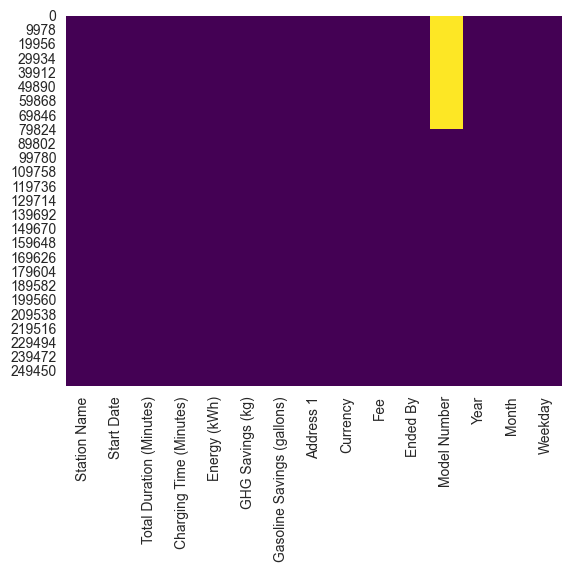

In [15]:
sns.heatmap(workingEvData.isna(),cmap="viridis",cbar=False) #EagleEyeView

In [16]:
for column in workingEvData.columns:
    print(column, sum(workingEvData[column].isna()))


Station Name 0
Start Date 0
Total Duration (Minutes) 0
Charging Time (Minutes) 0
Energy (kWh) 0
GHG Savings (kg) 0
Gasoline Savings (gallons) 0
Address 1 0
Currency 1788
Fee 0
Ended By 248
Model Number 78948
Year 0
Month 0
Weekday 0


In [17]:
print(workingEvData["Currency"].value_counts()) #Which currency did we get paid much, as we can dont have user data still can get insights
workingEvData.drop(["Currency"],axis=1,inplace=True)

USD    257613
EUR         8
MXN         5
CAD         1
Name: Currency, dtype: int64


In [18]:
print(workingEvData[workingEvData["Ended By"]=="Unknown"]["Ended By"].value_counts(),"\n")
#I am using Constant as category for Charging Ended by as it is already in Dataset as well
workingEvData["Ended By"].fillna("Unknown",inplace=True) 
#We already have Unknown so these nan values be added init
print(workingEvData["Ended By"].value_counts())

Unknown    32
Name: Ended By, dtype: int64 

Plug Out at Vehicle             210721
Customer                         41090
CPS Server                        7065
Unknown                            280
Outlet Unreachable                  64
Door Open                           57
Plug Removed While Rebooting        50
Final GFCI Tripped                  28
Door                                24
Final 4-strikes GFCI trip           15
Plug Out at Station                  7
Holster Plugin                       7
Station Offline                      3
OCD                                  2
Door Closed                          1
Relay Stuck Closed                   1
Name: Ended By, dtype: int64


In [19]:
#Getting Frequently Used Model at Each Station 
mydict=workingEvData.groupby("Station Name")["Model Number"].apply(lambda group:group.mode()[0])
def FillModelNumber(row):
    stationName = row[0]
    modelNumber = row[1]
    if not pd.isna(modelNumber):
        return modelNumber
    else:
        return mydict[stationName]

In [20]:
#Replacing Nan values with Most used Models(Mode) according to respective stations
workingEvData["Model Number"] = workingEvData[["Station Name","Model Number"]].apply(FillModelNumber,axis=1)

In [21]:
for column in workingEvData.columns:
    print(column, sum(workingEvData[column].isna()))

Station Name 0
Start Date 0
Total Duration (Minutes) 0
Charging Time (Minutes) 0
Energy (kWh) 0
GHG Savings (kg) 0
Gasoline Savings (gallons) 0
Address 1 0
Fee 0
Ended By 0
Model Number 0
Year 0
Month 0
Weekday 0


In [22]:
workingEvData

,Station Name,Start Date,Total Duration (Minutes),Charging Time (Minutes),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Address 1,Fee,Ended By,Model Number,Year,Month,Weekday
0,HAMILTON #1,2011-07-29 20:17:00,183.533333,114.050000,6.249457,2.625,0.784,hamilton,0.00,Plug Out at Vehicle,CT2100-HD-CDMA-CCR,2011,7,4
1,HAMILTON #1,2011-07-30 00:00:00,2.100000,1.900000,0.106588,0.045,0.013,hamilton,0.00,Customer,CT2100-HD-CDMA-CCR,2011,7,5
2,HAMILTON #1,2011-07-30 08:16:00,257.533333,257.466667,14.951777,6.280,1.876,hamilton,0.00,Plug Out at Vehicle,CT2100-HD-CDMA-CCR,2011,7,5
3,HAMILTON #1,2011-07-30 14:51:00,123.400000,122.966667,7.159643,3.007,0.899,hamilton,0.00,Customer,CT2100-HD-CDMA-CCR,2011,7,5
4,HAMILTON #1,2011-07-30 18:51:00,71.400000,43.900000,1.957765,0.822,0.246,hamilton,0.00,Plug Out at Vehicle,CT2100-HD-CDMA-CCR,2011,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,TED THOMPSON #3,2020-12-31 16:39:00,35.733333,35.300000,1.841000,0.773,0.231,cambridge,0.42,Plug Out at Vehicle,CT4020-HD-GW,2020,12,3
259411,WEBSTER #1,2020-12-31 16:48:00,223.016667,134.066667,12.744000,5.352,1.599,webster,4.69,Plug Out at Vehicle,CT4020-HD-GW,2020,12,3
259412,MPL #4,2020-12-31 17:28:00,1048.233333,308.200000,29.665000,12.459,3.723,middlefield,6.82,Plug Out at Vehicle,CT4010-HD-GW,2020,12,3
259413,WEBSTER #1,2020-12-31 17:49:00,245.566667,233.700000,11.976000,5.030,1.503,webster,2.75,Plug Out at Vehicle,CT4020-HD-GW,2020,12,3


#### Exploratory Data Analysis

In [23]:
workingEvData.describe()

,Total Duration (Minutes),Charging Time (Minutes),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Fee,Year,Month,Weekday
count,259415.000000,259415.000000,259415.000000,259415.000000,259415.000000,259415.000000,259415.000000,259415.000000,259415.000000
mean,149.209249,119.947419,8.544277,3.588596,1.072306,1.097481,2016.958121,6.461955,2.859800
std,132.759684,82.955033,7.185462,3.017894,0.901776,1.934408,1.994255,3.467853,1.925194
min,1.000000,0.100000,0.010000,0.004000,0.001000,0.000000,2011.000000,1.000000,0.000000
25%,70.250000,62.400000,3.784000,1.589000,0.475000,0.000000,2016.000000,3.000000,1.000000
50%,125.350000,108.983333,6.868634,2.885000,0.862000,0.000000,2017.000000,6.000000,3.000000
75%,185.400000,161.833333,11.458340,4.813000,1.438000,1.640000,2019.000000,10.000000,4.000000
max,6872.350000,1375.916667,97.360000,40.891000,12.219000,84.560000,2020.000000,12.000000,6.000000


<b>Customer Statistics</b>
<br>Over the past decade, customers have, on average, spent 119 minutes, equivalent to 2 hours, on a single charging session. 
<br>Over the past decade, customers spent more than 62.4 minutes on a single electric vehicle charging session for 75% of the time.
<br><b>Energy Statistics</b>
<br>Over the past decade, we have generated on average, 8.5 kWh of energy for every single electric vehicle charging session.
<br>Over the past decade, Maximum energy produced by a model for single electric vehicle charging session was 97.36 kWh.
<br><b>Savings Statistics</b>
<br>Over the past decade, we have saved on average 3.58 Kg of Greenhouse Gas emissions for every single electric vehicle charging session.
<br>Over the past decade, we have saved on average 1.072 Gallons of Gasoline for every single electric vehicle charging session.

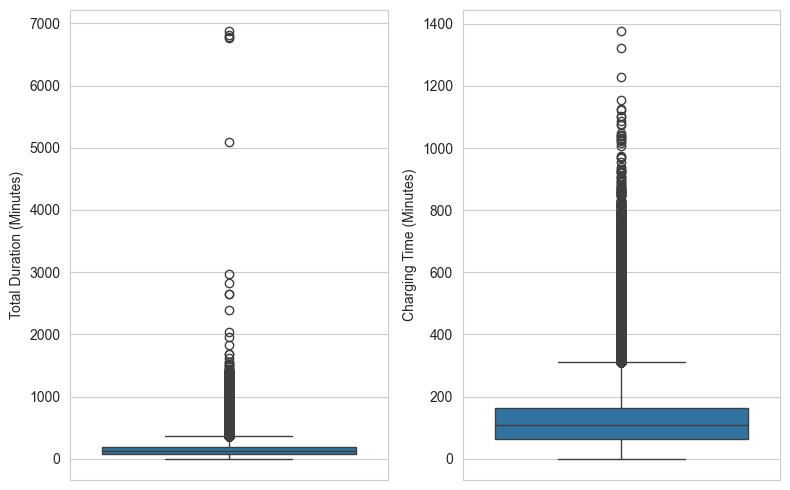

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
sns.boxplot(y=workingEvData["Total Duration (Minutes)"],ax=axes[0])
sns.boxplot(y=workingEvData["Charging Time (Minutes)"],ax=axes[1])
plt.tight_layout()

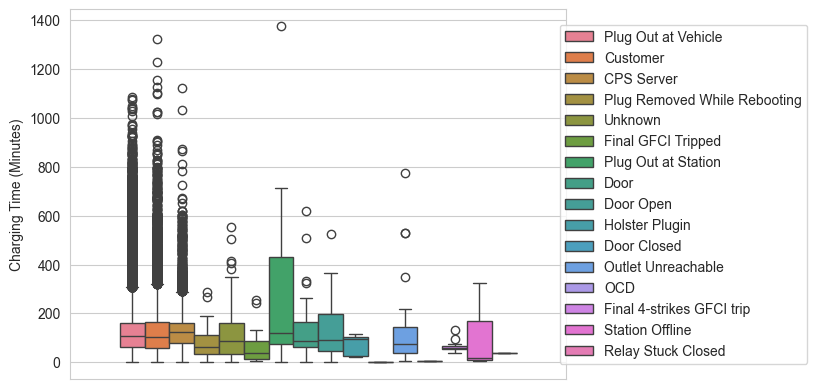

In [25]:
sns.boxplot(y=workingEvData["Charging Time (Minutes)"],hue=workingEvData["Ended By"])
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))

<Axes: xlabel='Energy (kWh)', ylabel='Count'>

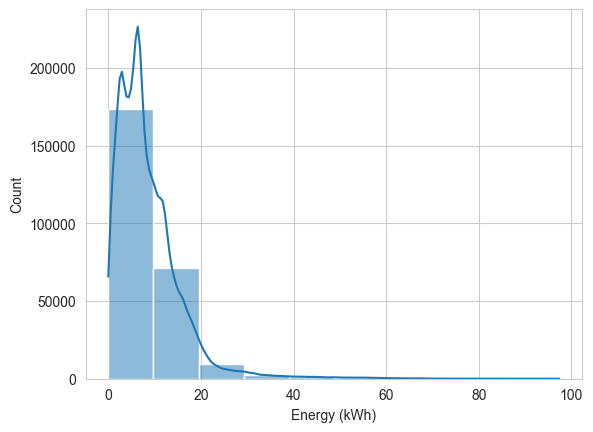

In [26]:
sns.histplot(workingEvData["Energy (kWh)"],kde=True,bins=10)

<Axes: ylabel='GHG Savings (kg)'>

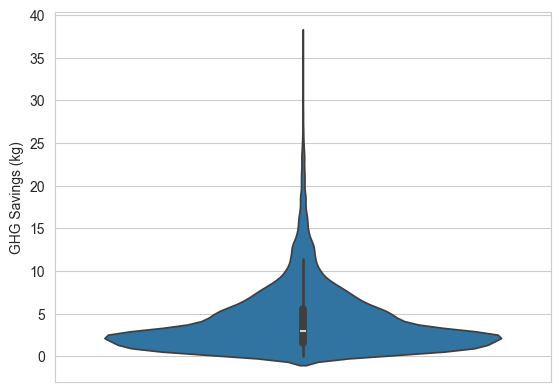

In [27]:
sns.violinplot(y=workingEvData[workingEvData["Year"]==2020]["GHG Savings (kg)"])

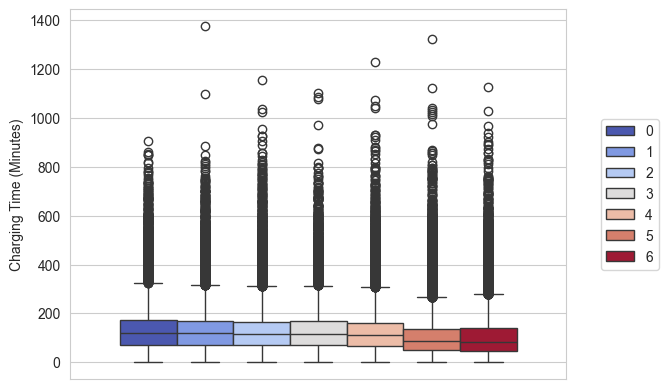

In [28]:
#We can deduce On Saturdays average Charging times are comparitively Less as compared to Other Days.
sns.boxplot(y=workingEvData["Charging Time (Minutes)"],hue=workingEvData["Weekday"],palette="coolwarm")
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5))

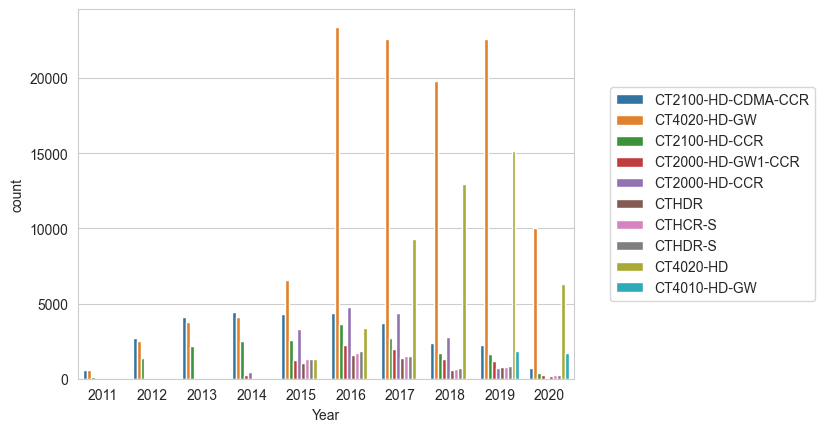

In [29]:
#We can deduce over the Years the most popular model for customer to charge their vehicles has been CT4020-HD-GW
sns.countplot(x=workingEvData["Year"],hue=workingEvData["Model Number"])
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))

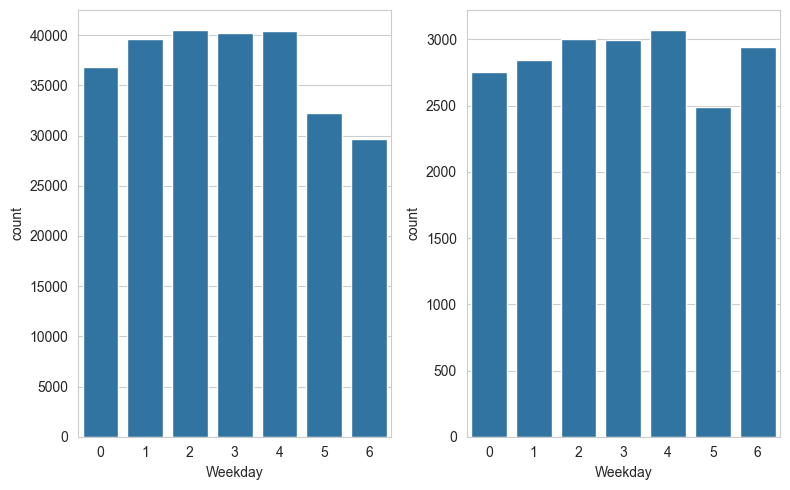

In [30]:
# We can deduce, Over the Decade least numbers of user came on Sunday. 
# But Last Year, Least Number of Footfall to our Stations was on Saturday. 
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
sns.countplot(x=workingEvData["Weekday"],ax=axes[0])
sns.countplot(x=workingEvData[workingEvData["Year"]==2020]["Weekday"],ax=axes[1])
plt.tight_layout()

In [31]:
#Over the Last 5 Years, In Summer Which Month we have to produce more energy
workingEvData[(workingEvData["Year"]>=2016) & (workingEvData["Month"].isin([6,7,8]))].groupby("Month")["Energy (kWh)"].sum()
#The most energy was produced in July, over last 5 years

Month
6    151004.583608
7    152512.869029
8    143290.834548
Name: Energy (kWh), dtype: float64

In [32]:
#In SHERMAN  Area Show me Each Station Average Charging Time 
workingEvData[(workingEvData["Address 1"]>="sherman")].groupby("Station Name")["Charging Time (Minutes)"].mean()

Station Name
RINCONADA LIB 1    113.736676
RINCONADA LIB 2    115.668271
RINCONADA LIB 3    111.107373
SHERMAN 1          175.871429
SHERMAN 11         177.800000
SHERMAN 14          91.325000
SHERMAN 15         109.283333
SHERMAN 17          72.716667
SHERMAN 2          115.920833
SHERMAN 3          146.033333
SHERMAN 4           99.154167
SHERMAN 5           28.800000
SHERMAN 6          112.244444
SHERMAN 7          192.383333
SHERMAN 8          342.808333
SHERMAN 9           48.150000
WEBSTER #1         128.787551
WEBSTER #2         129.894452
WEBSTER #3         125.517728
Name: Charging Time (Minutes), dtype: float64

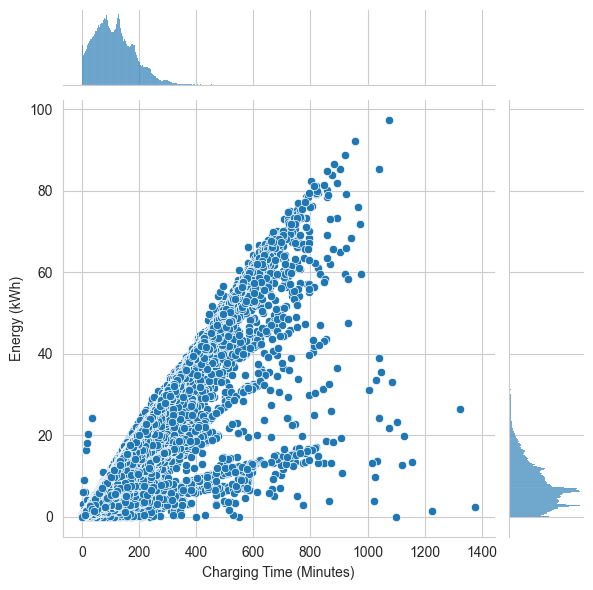

In [33]:
sns.jointplot(x="Charging Time (Minutes)",y="Energy (kWh)",data=workingEvData) #By Default scatter

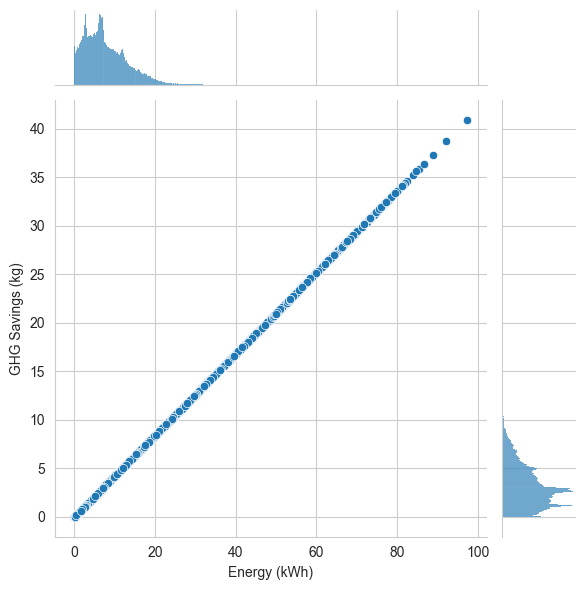

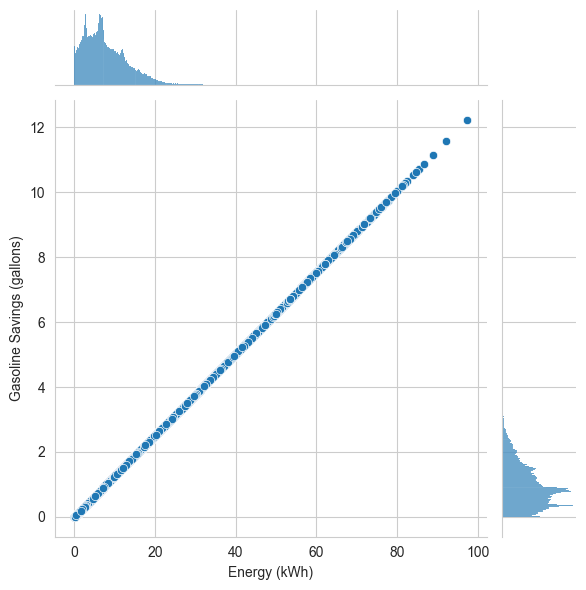

In [34]:
sns.jointplot(x="Energy (kWh)",y="GHG Savings (kg)",data=workingEvData) #By Default scatter
sns.jointplot(x="Energy (kWh)",y="Gasoline Savings (gallons)",data=workingEvData)

<Axes: >

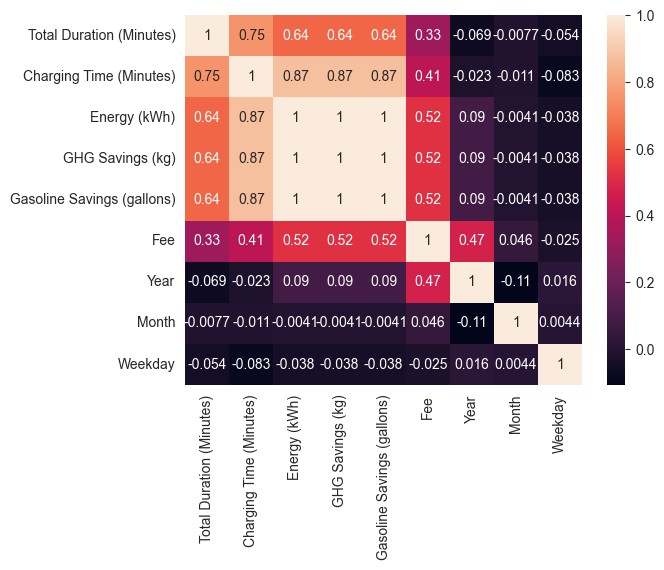

In [35]:
sns.heatmap(workingEvData.corr(),annot=True)

### Modelling


We can use sattio name and address for group with street name(roll up as in olap to look on larger/upper scale with all streets coombined in a single term) and sation name, 
We can use total duration-chargign time to get wait time
Documentation of everything - look into standard
model prediction saving gaslight, through energy and charging time 


#### Regression Problem

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


In [37]:
#Encoding Categorical Variables
modelNumber_label_encoder = LabelEncoder()
workingEvData["Model Number"] = modelNumber_label_encoder.fit_transform(workingEvData["Model Number"])
stationLabelEncoder = LabelEncoder()
workingEvData['Station Name'] = stationLabelEncoder.fit_transform(workingEvData['Station Name'])
addressLabelEncoder = LabelEncoder()
workingEvData['Address 1'] = addressLabelEncoder.fit_transform(workingEvData['Address 1'])

In [38]:
#Doing A/B Testing comparing two versions, SLM amd MLR Model
#SLM
X_Data = workingEvData[["Energy (kWh)"]]
Y_Data = workingEvData[["GHG Savings (kg)","Gasoline Savings (gallons)"]]
X_train, X_test, y_train, y_test = train_test_split(X_Data, Y_Data, test_size=0.30, random_state=101)

print(X_train.shape, X_test.shape,y_train.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linearModel = LinearRegression(fit_intercept=False)
linearModel.fit(X_train_scaled,y_train)

predictions = linearModel.predict(X_test_scaled)

print("MAE:- ", mean_absolute_error(y_test,predictions))
print("MSE:- ", mean_squared_error(y_test,predictions))
print("RMSE:- ", np.sqrt(mean_squared_error(y_test,predictions)))
print("R2 value:- ", r2_score(y_test,predictions))

(181590, 1) (77825, 1) (181590, 2)
MAE:-  2.328864824217565
MSE:-  7.004388969499918
RMSE:-  2.6465806183639895
R2 value:-  -0.39468463331696324


In [39]:
#MLR
X_Data = workingEvData[["Charging Time (Minutes)","Energy (kWh)"]]
Y_Data = workingEvData[["GHG Savings (kg)","Gasoline Savings (gallons)"]]
X_train, X_test, y_train, y_test = train_test_split(X_Data, Y_Data, test_size=0.30, random_state=101)

print(X_train.shape, X_test.shape,y_train.shape)

#Scaling through Standard Normalization technique
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linearModel = LinearRegression(fit_intercept=False)
linearModel.fit(X_train_scaled,y_train)

predictions = linearModel.predict(X_test_scaled)

print("MAE:- ", mean_absolute_error(y_test,predictions))
print("MSE:- ", mean_squared_error(y_test,predictions))
print("RMSE:- ", np.sqrt(mean_squared_error(y_test,predictions)))
print("R2 value:- ", r2_score(y_test,predictions))

(181590, 2) (77825, 2) (181590, 2)
MAE:-  2.3288648233985354
MSE:-  7.004388966213734
RMSE:-  2.646580617743154
R2 value:-  -0.39468463174045076


In [40]:
X_Data =workingEvData[["Charging Time (Minutes)","Energy (kWh)","Year","Model Number"]]
Y_Data = workingEvData[["GHG Savings (kg)","Gasoline Savings (gallons)"]]
X_train, X_test, y_train, y_test = train_test_split(X_Data, Y_Data, test_size=0.30, random_state=101)

columns_To_Scale = ["Charging Time (Minutes)","Energy (kWh)"]
X_train_subset = X_train[columns_To_Scale]
X_test_subset = X_test[columns_To_Scale]

scaler = StandardScaler()
X_train_subset = scaler.fit_transform(X_train_subset)
X_test_subset = scaler.transform(X_test_subset)

print(X_train.head(2),"\n",X_test.head(2))
X_train[columns_To_Scale]= X_train_subset
X_test[columns_To_Scale]=X_test_subset
print(X_train.head(2),"\n",X_test.head(2))

linearModel = LinearRegression(fit_intercept =False)
linearModel.fit(X_train,y_train)

predictions = linearModel.predict(X_test)

print("MAE:- ", mean_absolute_error(y_test,predictions))
print("MSE:- ", mean_squared_error(y_test,predictions))
print("RMSE:- ", np.sqrt(mean_squared_error(y_test,predictions)))
print("R2 value:- ", r2_score(y_test,predictions))

        Charging Time (Minutes)  Energy (kWh)  Year  Model Number
34356                 57.483333      1.763927  2015             7
161076               172.166667      8.752000  2018             6 
         Charging Time (Minutes)  Energy (kWh)  Year  Model Number
15028                259.266667     15.706937  2013             2
185856               107.383333     11.027000  2018             5
        Charging Time (Minutes)  Energy (kWh)  Year  Model Number
34356                 -0.754514     -0.945340  2015             7
161076                 0.632456      0.029798  2018             6 
         Charging Time (Minutes)  Energy (kWh)  Year  Model Number
15028                  1.685835      1.000312  2013             2
185856                -0.151028      0.347259  2018             5
MAE:-  0.0017921539765578588
MSE:-  6.316337604946444e-06
RMSE:-  0.002513232501171836
R2 value:-  0.9999987051949009


In [41]:
df = pd.DataFrame(linearModel.coef_,columns=["Charging Time (Minutes)","Energy (kWh)","Year","Model Number"],index=["GHG Savings (kg)","Gasoline Savings (gallons)"])
df1 = pd.DataFrame(linearModel.intercept_,columns=["Intercept"],index=["GHG Savings (kg)","Gasoline Savings (gallons)"])
modelParameters = pd.concat([df1,df],axis=1)
modelParameters

,Intercept,Charging Time (Minutes),Energy (kWh),Year,Model Number
GHG Savings (kg),0.0,0.001483,3.008235,0.001779,-0.000337
Gasoline Savings (gallons),0.0,0.000444,0.898889,0.000532,-0.000101


According to Our Linear Model, 1 unit increase in Energy(kwh) increases GHG Savings (kg) by 3.009821 <br>
According to Our Linear Model, 1 unit increase in Energy(kwh) increases Gasoline Savings (gallons) by 0.899363

#### Classification Problem

C:\Users\Lenovo\anaconda3\envs\dataml100\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Lenovo\anaconda3\envs\dataml100\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


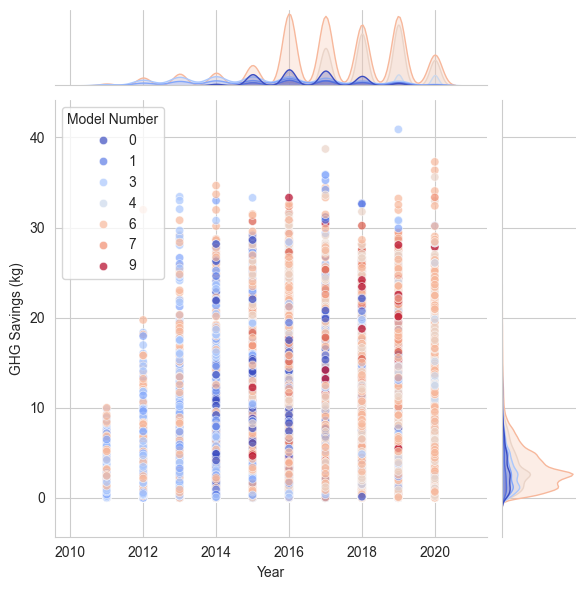

In [42]:
sns.jointplot(x=workingEvData["Year"],y=workingEvData["GHG Savings (kg)"],hue=workingEvData["Model Number"],palette="coolwarm",alpha=0.7)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
class_list = [0,1,2,3,4,5,6,7,8,9]

In [44]:
X_Data =workingEvData[["Charging Time (Minutes)","Energy (kWh)","Year","GHG Savings (kg)","Gasoline Savings (gallons)","Station Name"]]
Y_Data = workingEvData[["Model Number"]]
X_train, X_test, y_train, y_test = train_test_split(X_Data, Y_Data, test_size=0.30, random_state=101)

#Logistic Regression isn't good with high values, so we have to standardize our categorical variable Year as well. 
columns_To_Scale = ["Charging Time (Minutes)","Energy (kWh)","GHG Savings (kg)","Gasoline Savings (gallons)","Year","Station Name"]
X_train_subset = X_train[columns_To_Scale]
X_test_subset = X_test[columns_To_Scale]

scaler = StandardScaler()
X_train_subset = scaler.fit_transform(X_train_subset)
X_test_subset = scaler.transform(X_test_subset)

X_train[columns_To_Scale]= X_train_subset
X_test[columns_To_Scale]=X_test_subset

logisticModel = LogisticRegression(multi_class="multinomial")
logisticModel.fit(X_train,y_train)

predictions = logisticModel.predict(X_test)

print(logisticModel.coef_)
print(classification_report(y_test,predictions))
print("\n\n")
print(pd.DataFrame(confusion_matrix(y_test,predictions),index=class_list,columns=class_list))
#Index are actual values, Column are predicted values
#Same row False Negative except where row and colum match , that is True Positive
#Same column False Positive except where row and colum match , that is True Positive

C:\Users\Lenovo\anaconda3\envs\dataml100\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-0.23659437  0.07503379 -0.5264606   0.07542802  0.07552595  1.24646043]
 [-0.05509957  0.00900318 -0.26233788  0.00871562  0.00901366  1.12575657]
 [ 0.19392282 -0.06088081 -0.85296789 -0.06110337 -0.06091413 -8.18172517]
 [ 0.28401462 -0.08472309 -1.14243075 -0.08487948 -0.08474379 -2.45488975]
 [-0.29672034  0.04745165  3.18520174  0.04747765  0.04715937  1.37668351]
 [ 0.10489819 -0.03227916  0.72858863 -0.0314291  -0.02959167  1.23406485]
 [ 0.41580063 -0.13353888 -0.06664682 -0.13421863 -0.13598077  1.26853384]
 [-0.11639289  0.05803979 -0.36297825  0.05805638  0.05806646  1.3887046 ]
 [-0.08016787  0.04817529 -0.34803984  0.04802678  0.04799866  1.46096506]
 [-0.21366123  0.07371823 -0.35192836  0.07392614  0.07346627  1.53544605]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5027
           1       0.00      0.00      0.00      2555
           2       0.49      0.67      0.57      5682
           3       0.22      0.1

C:\Users\Lenovo\anaconda3\envs\dataml100\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\envs\dataml100\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\envs\dataml100\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F

We can See that overall accuracy is around 50%. But dissecting  on class level certain class were not used at all, this MissClassification happened largely because of Class Imbalancing. <br>
Further analysis also shows that Precision of some individual classes which are being identified class is even less or 0.<br>
Precision=  True Positives class (A) / True Positives Class(A)+False Positives Class (A). Means of All of the time model was predicting an instance to be this class , How many times it was true. <br>
Recall = True Positive Rate=  True Positives Class (A)/ True Positives Class (A)+False Negatives Class (A)



Model Number
6               81165
5               33958
3               20772
2               13181
0               11370
1                5831
9                4578
7                4352
8                3876
4                2507
dtype: int64 
 The predicted unique values are [0 2 3 5 6]


<Axes: xlabel='Model Number', ylabel='count'>

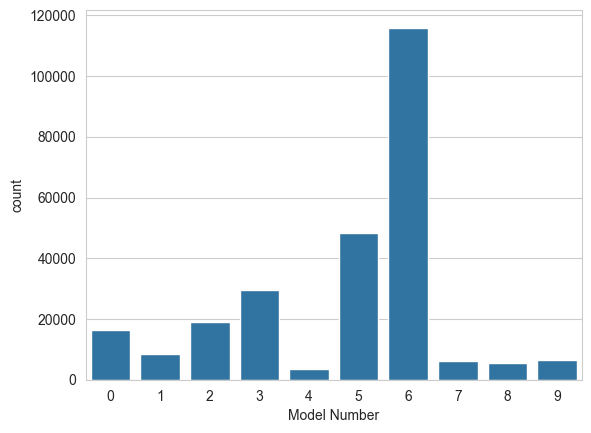

In [45]:



print(y_train.value_counts(),"\n The predicted unique values are",np.unique(predictions))
sns.countplot(x=workingEvData["Model Number"].astype("category"))

I am going to do classification with Decision Trees instead of SVM as dataset is larger and imbalanced.<br>
I chose Decision Trees instead of Random Forest as classes are largely imbalanced

In [47]:
X_Data =workingEvData[["Charging Time (Minutes)","Energy (kWh)","Year","GHG Savings (kg)","Gasoline Savings (gallons)","Station Name","Address 1"]]
Y_Data = workingEvData[["Model Number"]]
X_train, X_test, y_train, y_test = train_test_split(X_Data, Y_Data, test_size=0.30, random_state=101)

columns_To_Scale = ["Charging Time (Minutes)","Energy (kWh)","GHG Savings (kg)","Gasoline Savings (gallons)"]
X_train_subset = X_train[columns_To_Scale]
X_test_subset = X_test[columns_To_Scale]

scaler = StandardScaler()
X_train_subset = scaler.fit_transform(X_train_subset)
X_test_subset = scaler.transform(X_test_subset)

X_train[columns_To_Scale]= X_train_subset
X_test[columns_To_Scale]=X_test_subset

In [48]:
X_train

,Charging Time (Minutes),Energy (kWh),Year,GHG Savings (kg),Gasoline Savings (gallons),Station Name,Address 1
34356,-0.754514,-0.945340,2015,-0.945290,-0.945754,24,8
161076,0.632456,0.029798,2018,0.029851,0.029380,46,9
212489,-1.033480,-0.894536,2019,-0.894456,-0.894606,25,6
241976,-1.069560,-0.768807,2020,-0.768867,-0.768962,23,5
213449,0.004177,0.414379,2019,0.414259,0.414097,44,9
...,...,...,...,...,...,...,...
136767,-0.459019,-0.177284,2017,-0.177138,-0.177433,12,3
204614,0.523207,1.028229,2019,1.028249,1.027864,15,4
214353,2.270777,1.107769,2019,1.107656,1.107920,9,1
214539,-1.285033,-1.092827,2019,-1.092807,-1.092524,41,1


In [49]:
from sklearn.tree import DecisionTreeClassifier

decisionTreeModel = DecisionTreeClassifier(criterion="entropy")

decisionTreeModel.fit(X_train,y_train)
predictions = decisionTreeModel.predict(X_test)

#Feature Importance Analysis
print(decisionTreeModel.feature_importances_)
print(classification_report(y_test,predictions))
print("\n\n")
print(pd.DataFrame(confusion_matrix(y_test,predictions),index=class_list,columns=class_list))


[0.00514126 0.00233746 0.07061525 0.00211182 0.00207537 0.75573289
 0.16198595]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5027
           1       0.98      0.98      0.98      2555
           2       1.00      1.00      1.00      5682
           3       0.97      0.97      0.97      8787
           4       0.85      0.84      0.85      1069
           5       0.99      0.99      0.99     14491
           6       0.99      0.99      0.99     34756
           7       1.00      1.00      1.00      1860
           8       1.00      1.00      1.00      1677
           9       1.00      1.00      1.00      1921

    accuracy                           0.99     77825
   macro avg       0.98      0.98      0.98     77825
weighted avg       0.99      0.99      0.99     77825




      0     1     2     3    4      5      6     7     8     9
0  4918     0     0     0  109      0      0     0     0     0
1     0  2512     0     0   43  

In [50]:
from sklearn.ensemble import RandomForestClassifier

randomForestModel = RandomForestClassifier(n_estimators=50,criterion='entropy')
print(classification_report(y_test,predictions))
print("\n\n")
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5027
           1       0.98      0.98      0.98      2555
           2       1.00      1.00      1.00      5682
           3       0.97      0.97      0.97      8787
           4       0.85      0.84      0.85      1069
           5       0.99      0.99      0.99     14491
           6       0.99      0.99      0.99     34756
           7       1.00      1.00      1.00      1860
           8       1.00      1.00      1.00      1677
           9       1.00      1.00      1.00      1921

    accuracy                           0.99     77825
   macro avg       0.98      0.98      0.98     77825
weighted avg       0.99      0.99      0.99     77825




[[ 4918     0     0     0   109     0     0     0     0     0]
 [    0  2512     0     0    43     0     0     0     0     0]
 [    0     0  5682     0     0     0     0     0     0     0]
 [    0     0     0  8555     7     0   225     0

### Time Series Savings Prediction using Deep Learning

In [67]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.preprocessing.sequence import TimeseriesGenerator


In [85]:
monthly_data = workingEvData[['Start Date','Charging Time (Minutes)','Energy (kWh)','GHG Savings (kg)']].groupby(pd.Grouper(key="Start Date",freq="M")).sum()

#Extrapolation, last 2 months predictions of savings. 
splitIndex=len(monthly_data)-2
trainData = monthly_data[:splitIndex]
testSplitIndex = len(monthly_data)-14
testData = monthly_data[testSplitIndex:]

timeSeries_scaler = StandardScaler()
scaled_monthly_train_data= timeSeries_scaler.fit_transform(trainData)
scaled_monthly_test_data = timeSeries_scaler.transform(testData)

sequence_length=12
traingenerator = TimeseriesGenerator(scaled_monthly_train_data[:,[0,1]], scaled_monthly_train_data[:,2], length=sequence_length, batch_size=1)
testgenerator = TimeseriesGenerator(scaled_monthly_test_data[:,[0,1]], scaled_monthly_test_data[:,2], length=sequence_length, batch_size=1)



model = Sequential()
model.add(LSTM(units=50, activation='LeakyReLU', input_shape=(sequence_length, 2), kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(units=1))  #  fully connected Output layer with 1 neuron for predicting GHG Savings (kg)
model.compile(optimizer='adam', loss='mean_squared_error')
#Adam uses weighted average to save itself from local minima 

In [80]:
len(testgenerator)

2

In [86]:
model.fit(traingenerator, epochs=100, verbose=1)

Epoch 1/100
100/100 [==============================] - 2s 5ms/step - loss: 1.0595
Epoch 2/100
100/100 [==============================] - 0s 5ms/step - loss: 0.3933
Epoch 3/100
100/100 [==============================] - 0s 5ms/step - loss: 0.2667
Epoch 4/100
100/100 [==============================] - 0s 5ms/step - loss: 0.1670
Epoch 5/100
100/100 [==============================] - 0s 5ms/step - loss: 0.1747
Epoch 6/100
100/100 [==============================] - 0s 5ms/step - loss: 0.1709
Epoch 7/100
100/100 [==============================] - 1s 6ms/step - loss: 0.1650
Epoch 8/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1862
Epoch 9/100
100/100 [==============================] - 0s 5ms/step - loss: 0.1514
Epoch 10/100
100/100 [==============================] - 0s 5ms/step - loss: 0.1315
Epoch 11/100
100/100 [==============================] - 1s 8ms/step - loss: 0.1159
Epoch 12/100
100/100 [==============================] - 1s 6ms/step - loss: 0.1290
Epoch 13/100


100/100 [==============================] - 1s 6ms/step - loss: 0.0487
Epoch 100/100
100/100 [==============================] - 1s 5ms/step - loss: 0.0662


In [87]:
predictions = model.predict(testgenerator)

2/2 [==============================] - 0s 4ms/step


In [88]:
predictions

array([[-0.39710575],
       [-0.36292106]], dtype=float32)

In [89]:
sample_output = np.zeros((2, 3)) 
sample_output[0,2] = predictions[0]
sample_output[1,2] = predictions[1]
sample_output

array([[ 0.        ,  0.        , -0.39710575],
       [ 0.        ,  0.        , -0.36292106]])

In [90]:
transformed_values = timeSeries_scaler.inverse_transform(sample_output)
print(transformed_values[:,2])

[5875.08912919 6077.3012397 ]


In [91]:
monthly_data.iloc[-2:]

,Charging Time (Minutes),Energy (kWh),GHG Savings (kg)
Start Date,,,
2020-11-30,145068.35,12398.792,5207.513
2020-12-31,131906.80,11026.273,4631.028


Future Work can be done hyper parameter tunning (Number of iterations, number of hidden layers, Number of neurons, choice of activation functions, Regularization parameter etc), using complex architectures, 

##### Saving the Datset for Dashbaords, Reports and Future Use

In [60]:
weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
workingEvData['Weekday'] = workingEvData['Weekday'].map(weekday_names)

workingEvData["Model Number"] = modelNumber_label_encoder.inverse_transform(workingEvData["Model Number"])
workingEvData['Station Name'] = stationLabelEncoder.inverse_transform(workingEvData['Station Name'])
workingEvData['Address 1'] = addressLabelEncoder.inverse_transform(workingEvData['Address 1'])

workingEvData.to_csv('kempower_Data.csv', index=False)

In [61]:
workingEvData

,Station Name,Start Date,Total Duration (Minutes),Charging Time (Minutes),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Address 1,Fee,Ended By,Model Number,Year,Month,Weekday
0,HAMILTON #1,2011-07-29 20:17:00,183.533333,114.050000,6.249457,2.625,0.784,hamilton,0.00,Plug Out at Vehicle,CT2100-HD-CDMA-CCR,2011,7,Friday
1,HAMILTON #1,2011-07-30 00:00:00,2.100000,1.900000,0.106588,0.045,0.013,hamilton,0.00,Customer,CT2100-HD-CDMA-CCR,2011,7,Saturday
2,HAMILTON #1,2011-07-30 08:16:00,257.533333,257.466667,14.951777,6.280,1.876,hamilton,0.00,Plug Out at Vehicle,CT2100-HD-CDMA-CCR,2011,7,Saturday
3,HAMILTON #1,2011-07-30 14:51:00,123.400000,122.966667,7.159643,3.007,0.899,hamilton,0.00,Customer,CT2100-HD-CDMA-CCR,2011,7,Saturday
4,HAMILTON #1,2011-07-30 18:51:00,71.400000,43.900000,1.957765,0.822,0.246,hamilton,0.00,Plug Out at Vehicle,CT2100-HD-CDMA-CCR,2011,7,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,TED THOMPSON #3,2020-12-31 16:39:00,35.733333,35.300000,1.841000,0.773,0.231,cambridge,0.42,Plug Out at Vehicle,CT4020-HD-GW,2020,12,Thursday
259411,WEBSTER #1,2020-12-31 16:48:00,223.016667,134.066667,12.744000,5.352,1.599,webster,4.69,Plug Out at Vehicle,CT4020-HD-GW,2020,12,Thursday
259412,MPL #4,2020-12-31 17:28:00,1048.233333,308.200000,29.665000,12.459,3.723,middlefield,6.82,Plug Out at Vehicle,CT4010-HD-GW,2020,12,Thursday
259413,WEBSTER #1,2020-12-31 17:49:00,245.566667,233.700000,11.976000,5.030,1.503,webster,2.75,Plug Out at Vehicle,CT4020-HD-GW,2020,12,Thursday
